In [1]:
import timesfm

In [2]:
import numpy as np
import pandas as pd
import torch

In [3]:
torch.set_float32_matmul_precision("high")

model = timesfm.TimesFM_2p5_200M_torch.from_pretrained("google/timesfm-2.5-200m-pytorch")

model.compile(
    timesfm.ForecastConfig(
        max_context=1024,
        max_horizon=256,
        normalize_inputs=True,
        use_continuous_quantile_head=True,
        force_flip_invariance=True,
        infer_is_positive=True,
        fix_quantile_crossing=True,
    )
)
point_forecast, quantile_forecast = model.forecast(
    horizon=12,
    inputs=[
        np.linspace(0, 1, 100),
        #np.sin(np.linspace(0, 20, 67)),
    ],  # Two dummy inputs
)
#point_forecast.shape  # (2, 12)
quantile_forecast.shape  # (2, 12, 10): mean, then 10th to 90th quantiles.

(1, 12, 10)

In [4]:
point_forecast

array([[1.0127585, 1.0188391, 1.0272741, 1.0430081, 1.047941 , 1.059132 ,
        1.0746951, 1.0754817, 1.0890969, 1.1026995, 1.1116322, 1.1225954]],
      dtype=float32)

In [5]:
#12 arrays (one for each forecast point) and each has 10 of the quantiles (mean comes first)
quantile_forecast

array([[[1.0086802 , 0.98712194, 0.98712194, 0.99835545, 1.0127585 ,
         1.0127585 , 1.0127585 , 1.0151554 , 1.0404046 , 1.0404046 ],
        [1.0384545 , 0.9666004 , 0.98602396, 1.0054913 , 1.0054913 ,
         1.0188391 , 1.0256177 , 1.0256177 , 1.0480833 , 1.0651274 ],
        [1.0270889 , 0.9548238 , 1.0216362 , 1.0216362 , 1.0272741 ,
         1.0272741 , 1.0272741 , 1.0272741 , 1.0272741 , 1.0714977 ],
        [1.0307403 , 0.9885145 , 1.0255785 , 1.0272076 , 1.0272076 ,
         1.0430081 , 1.0638291 , 1.0638291 , 1.0638291 , 1.0792466 ],
        [1.0687447 , 0.9836807 , 1.0104626 , 1.0175166 , 1.0175166 ,
         1.047941  , 1.0686198 , 1.0686198 , 1.0730492 , 1.1158367 ],
        [1.0672146 , 0.9754264 , 1.0318005 , 1.0318005 , 1.0574005 ,
         1.059132  , 1.0629853 , 1.0846364 , 1.0846364 , 1.1377449 ],
        [1.0778631 , 1.0032642 , 1.0458052 , 1.0458052 , 1.0746951 ,
         1.0746951 , 1.0746951 , 1.0964134 , 1.0964134 , 1.1345385 ],
        [1.0968814 , 0.9867

In [42]:
updated_df = pd.read_csv("https://raw.githubusercontent.com/cdcepi/FluSight-forecast-hub/refs/heads/main/target-data/target-hospital-admissions.csv")
updated_df = updated_df[["date", "value", "location_name"]]
updated_df = updated_df[updated_df["location_name"] == "US"]
updated_df["date"] = pd.to_datetime(updated_df["date"])
updated_df.sort_values(by = ["date", "location_name"], inplace = True)
updated_df.reset_index(inplace=True)
updated_df = updated_df.rename(columns = {"date": "ds", "location_name": "unique_id", "value": "y"})

In [43]:
updated_df

,index,ds,y,unique_id
0,10017,2022-02-05,1091.0,US
1,9992,2022-02-12,1158.0,US
2,9930,2022-02-19,1490.0,US
3,9878,2022-02-26,1603.0,US
4,9818,2022-03-05,1791.0,US
...,...,...,...,...
185,261,2025-08-23,763.0,US
186,198,2025-08-30,844.0,US
187,106,2025-09-06,921.0,US
188,88,2025-09-13,958.0,US


In [44]:
updated_df["y"].to_numpy()

array([ 1091.,  1158.,  1490.,  1603.,  1791.,  2089.,  2611.,  2912.,
        3000.,  3130.,  3292.,  3450.,  3175.,  3162.,  3112.,  3118.,
        2729.,  2676.,  2201.,  1775.,  1365.,  1073.,   776.,   766.,
         627.,   522.,   486.,   490.,   483.,   482.,   545.,   576.,
         665.,   796.,   921.,  1306.,  1670.,  2271.,  4180.,  6400.,
        8579., 10940., 18149., 26812., 24006., 21570., 19606., 19456.,
       14060.,  7179.,  4487.,  3091.,  2594.,  2175.,  1906.,  1647.,
        1501.,  1371.,  1411.,  1329.,  1294.,  1198.,  1077.,   980.,
         903.,   992.,   978.,  1116.,   973.,   939.,   935.,   873.,
         813.,   836.,   699.,   736.,   645.,   768.,   687.,   703.,
         738.,   792.,   875.,   803.,   821.,   880.,  1025.,  1108.,
        1214.,  1465.,  1613.,  2011.,  2775.,  3491.,  4384.,  5947.,
        7487., 10268., 15711., 21672., 19510., 15889., 13291., 12986.,
       11957., 11626., 11117., 10856., 10805.,  9413.,  7321.,  6048.,
      

In [9]:
torch.set_float32_matmul_precision("high")

model = timesfm.TimesFM_2p5_200M_torch.from_pretrained("google/timesfm-2.5-200m-pytorch")

model.compile(
    timesfm.ForecastConfig(
        max_context=1024,
        max_horizon=256,
        normalize_inputs=True,
        use_continuous_quantile_head=True,
        force_flip_invariance=True,
        infer_is_positive=True,
        fix_quantile_crossing=True,
    )
)

In [10]:
point_forecast, quantile_forecast = model.forecast(
    horizon=4,
    inputs=[updated_df["y"].to_numpy()],
)

In [11]:
point_forecast

array([[ 582.7777 ,  727.37146, 1016.64343,  826.77216]], dtype=float32)

In [12]:
import plotly.graph_objects as go

In [26]:
forecast_dates = pd.to_datetime(pd.Series(["2025-09-27", "2025-10-04", "2025-10-11", "2025-10-18"]))
forecast_dates

0   2025-09-27
1   2025-10-04
2   2025-10-11
3   2025-10-18
dtype: datetime64[ns]

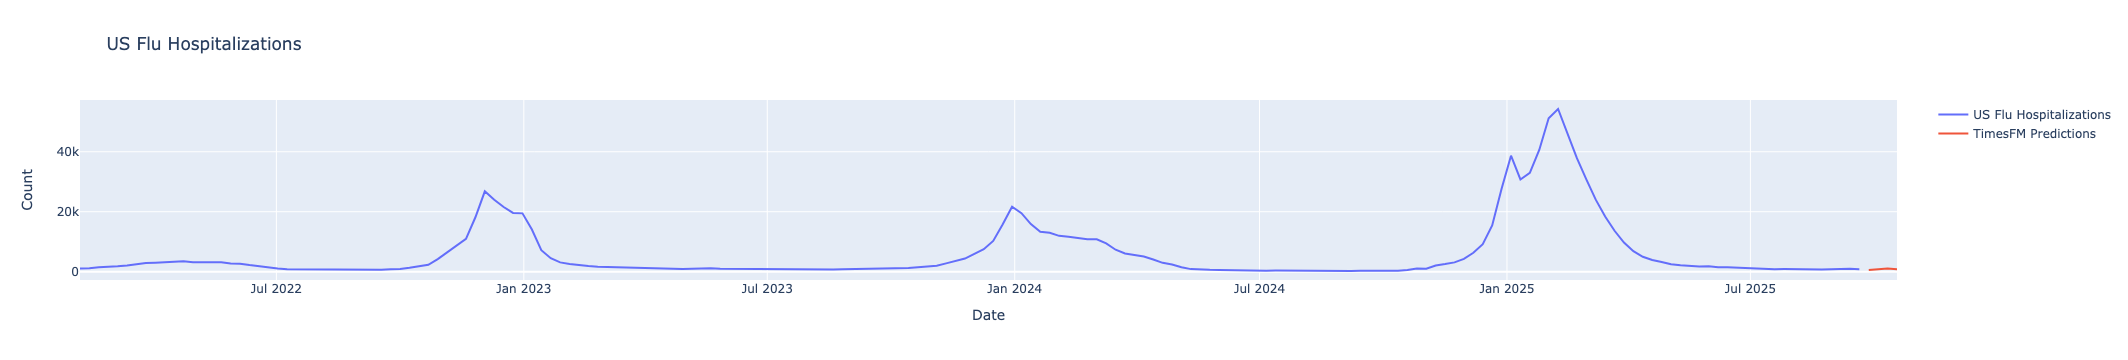

In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=updated_df["ds"], y = updated_df["y"], name="US Flu Hospitalizations", mode="lines"))
fig.add_trace(go.Scatter(x = forecast_dates, y = point_forecast.squeeze(), name = "TimesFM Predictions", mode = "lines"))
fig.update_layout(title = "US Flu Hospitalizations", xaxis_title = "Date", yaxis_title = "Count", hovermode = "x")
fig.show()

In [45]:
reference_dates = ["2024-10-05", "2024-10-19", "2024-11-02", "2024-11-16", "2024-12-07"]

In [46]:
training_dfs = []

for dates in reference_dates:
    df = updated_df[updated_df["ds"] <= dates]
    training_dfs.append(df)

In [47]:
fcs, q_fcs = model.forecast(
    horizon=4,
    inputs=[df["y"].to_numpy() for df in training_dfs]
)

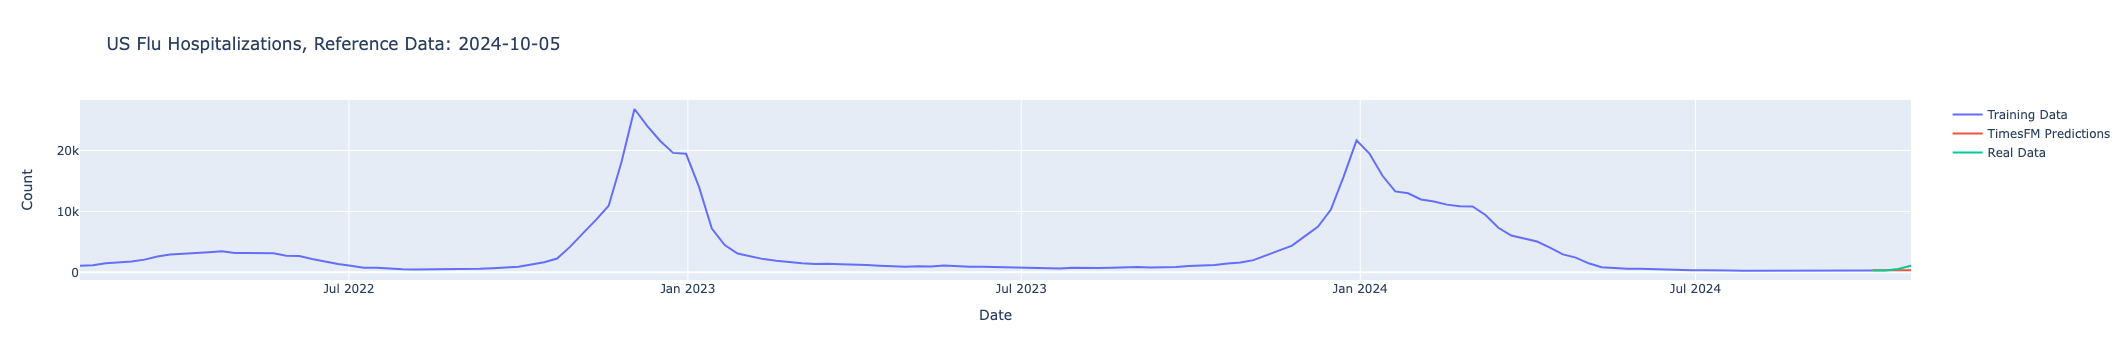

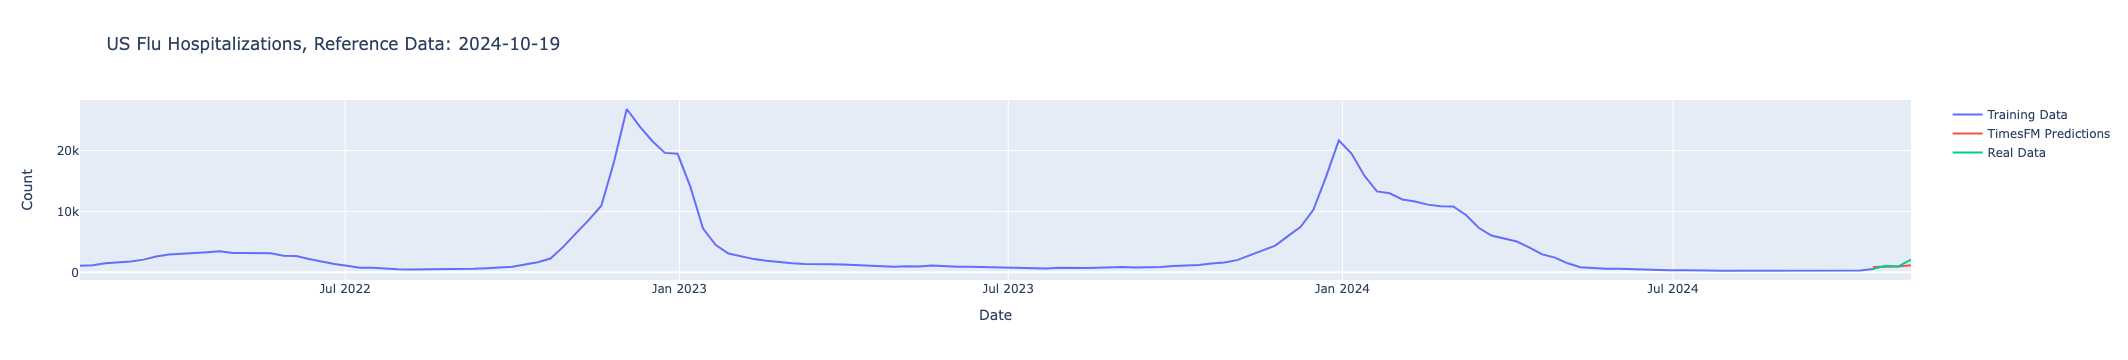

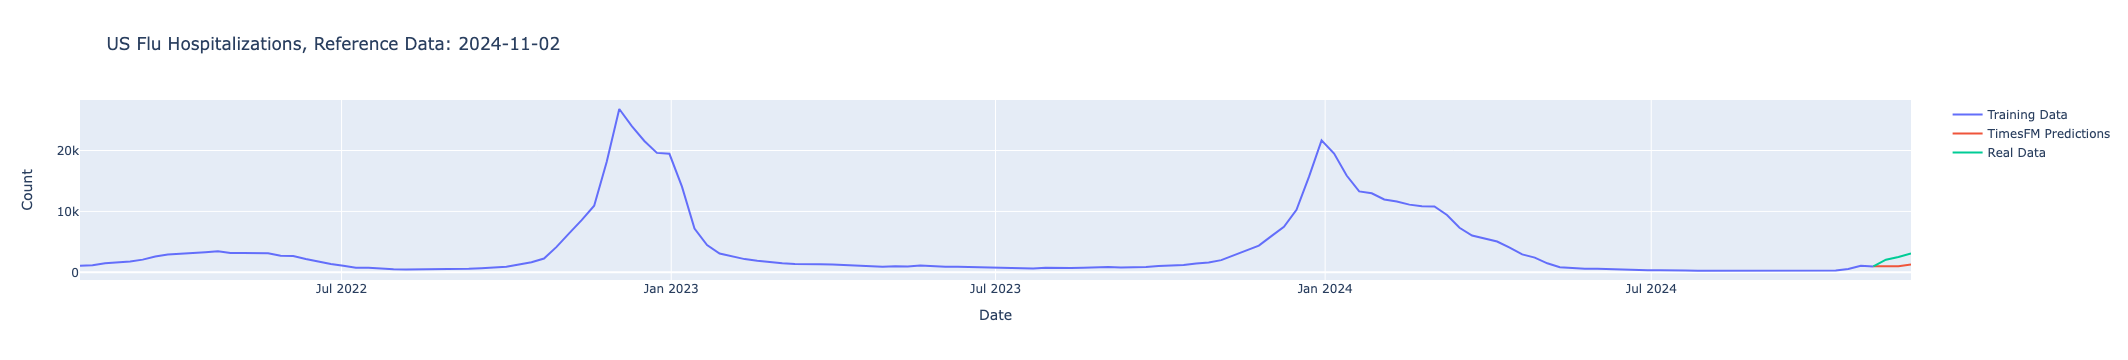

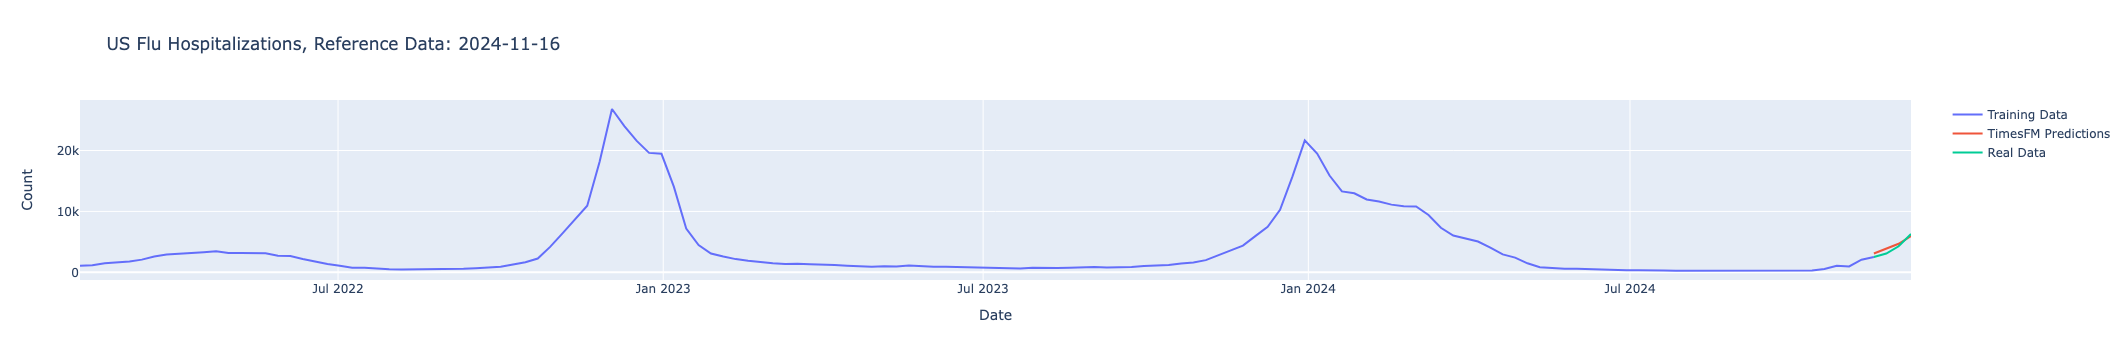

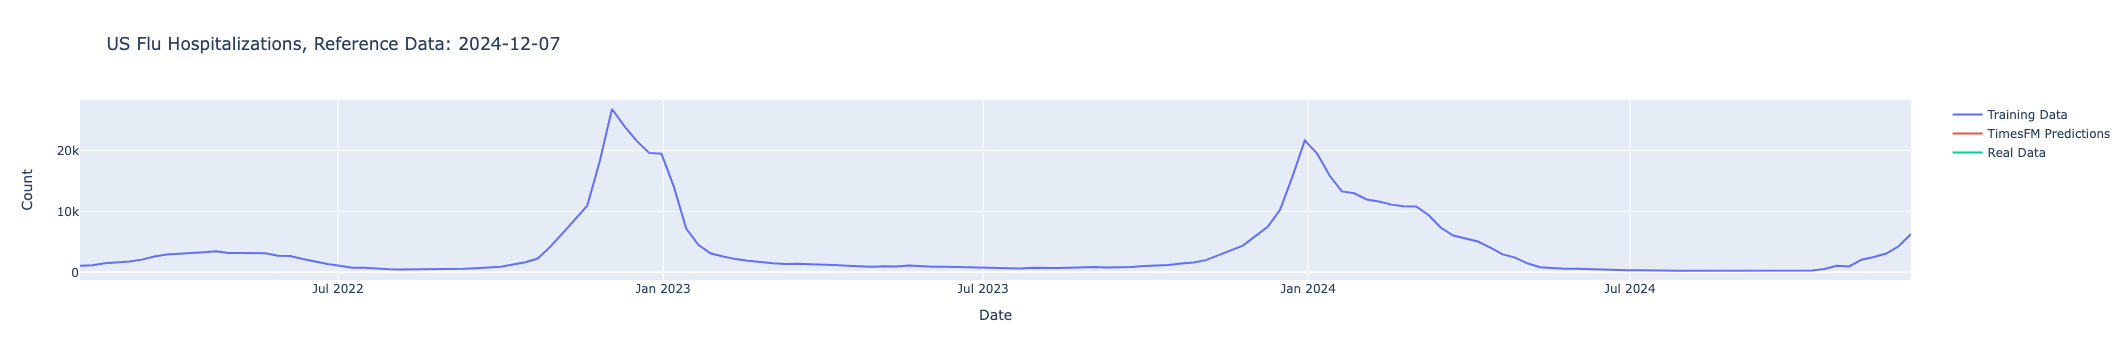

In [52]:
for i, date in enumerate(reference_dates):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=training_dfs[i]["ds"], y = training_dfs[i]["y"], name="Training Data", mode="lines"))
    
    start_date = pd.Timestamp(date)
    start_idx = df.index[df["ds"] == start_date][0]
    subset = df.iloc[start_idx:start_idx + 4]

    fig.add_trace(go.Scatter(x = subset["ds"], y = fcs[i].squeeze(), name = "TimesFM Predictions", mode = "lines"))
    fig.add_trace(go.Scatter(x = subset["ds"], y = subset["y"], name = "Real Data", mode = "lines"))
    fig.update_layout(title = f"US Flu Hospitalizations, Reference Data: {date}", xaxis_title = "Date", yaxis_title = "Count", hovermode = "x")
    fig.show()

In [56]:
df.index[df["ds"] == reference_dates[0]][0]

np.int64(139)